In [115]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Read in tables

In [2]:
fact = pd.read_csv('data/fact_table.csv')
customer = pd.read_csv('data/customer_dim.csv',encoding='iso-8859-1')
item = pd.read_csv('data/item_dim.csv',encoding='iso-8859-1')
store = pd.read_csv('data/store_dim.csv')
time = pd.read_csv('data/time_dim.csv')
transaction = pd.read_csv('data/trans_dim.csv')

# Clustering - weeding unprofitable stores

Sales Performance and Prediction  
Demand Forecasting and Inventory Management

**feature of store:**
- total revenue
- revenue each year
- revenue growth rate per year
- best sale product

## Sales Growth Rate each store each year plot

In [306]:
# combine fact table with time table
fact_time = pd.merge(fact, time, on = 'time_key')
# revenue of each store in each year from 2014-2020
revenue_store_year = fact_time.groupby(['store_key','year'])['total_price'].sum().reset_index()
revenue_store_year.columns = ['store_key','year','revenue']
revenue_store_year = revenue_store_year[revenue_store_year['year'] != 2021]
revenue_store_year['Date'] = pd.to_datetime(revenue_store_month[['year', 'month']].assign(Day=1))  # Adding a Day column for proper conversion
revenue_store_year['rev_growth_rate'] = revenue_store_year.groupby('store_key')['revenue'].pct_change()
revenue_store_year = revenue_store_year.dropna()
revenue_store_year.head(16)

,store_key,year,revenue,Date,rev_growth_rate
1,S0001,2015,19676.50,2014-02-01,0.117650
2,S0001,2016,18843.75,2014-03-01,-0.042322
3,S0001,2017,19681.50,2014-04-01,0.044458
4,S0001,2018,21689.25,2014-05-01,0.102012
5,S0001,2019,22251.25,2014-06-01,0.025911
6,S0001,2020,20262.50,2014-07-01,-0.089377
9,S0002,2015,20307.50,2014-10-01,0.021748
10,S0002,2016,21486.25,2014-11-01,0.058045
11,S0002,2017,19836.25,2014-12-01,-0.076793
12,S0002,2018,22004.25,2015-01-01,0.109295


In [309]:
# average growth rate of each store for 5 years from 2014-2020
avg_growth = revenue_store_year.groupby('store_key')['rev_growth_rate'].mean().reset_index()
avg_growth

,store_key,rev_growth_rate
0,S0001,0.026389
1,S0002,-0.008432
2,S0003,0.029900
3,S0004,0.006057
4,S0005,0.026699
...,...,...
721,S0095,-0.022077
722,S0096,0.013132
723,S0097,0.021112
724,S0098,0.016464


In [315]:
avg_growth[avg_growth['rev_growth_rate']<0].sort_values('rev_growth_rate').head(20)

,store_key,rev_growth_rate
499,S00545,-0.053566
556,S00597,-0.042534
534,S00577,-0.041039
172,S00248,-0.038390
17,S00107,-0.036816
371,S00429,-0.036418
659,S00690,-0.036407
77,S00161,-0.034275
251,S0032,-0.033746
560,S00600,-0.031351


## Sales Growth Rate Linear Prediction each year

In [294]:
# combine fact table with time table
fact_time = pd.merge(fact, time, on = 'time_key')
fact_time

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,hour,day,week,month,quarter,year
0,P026,C004510,T049189,I00177,S00307,1,ct,35.00,35.00,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
1,P004,C002005,T049189,I00101,S00408,2,tubs,15.00,30.00,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
2,P002,C002344,T049189,I00058,S00677,1,bottles,22.00,22.00,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
3,P035,C007222,T049189,I00042,S00616,3,bottles,28.00,84.00,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
4,P021,C001803,T049189,I00036,S00119,8,cans,16.00,128.00,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P024,C008905,T093351,I00205,S00578,8,ct,16.00,128.00,02-03-2015 07:13,7,2,1st Week,3,Q1,2015
999996,P005,C003845,T044140,I00150,S00498,7,bags,16.00,112.00,26-12-2017 02:01,2,26,4th Week,12,Q4,2017
999997,P022,C004574,T083509,I00218,S00540,3,ct,6.00,18.00,20-09-2016 00:15,0,20,3rd Week,9,Q3,2016
999998,P019,C000977,T070722,I00018,S00535,5,cans,6.75,33.75,31-10-2014 14:11,14,31,4th Week,10,Q4,2014


In [295]:
# revenue of each store in each year from 2014-2020
revenue_store_year = fact_time.groupby(['store_key','year'])['total_price'].sum().reset_index()
revenue_store_year.columns = ['store_key','year','revenue']
revenue_store_year
revenue_store_year = revenue_store_year[revenue_store_year['year'] != 2021]

,store_key,year,revenue
0,S0001,2014,17605.25
1,S0001,2015,19676.50
2,S0001,2016,18843.75
3,S0001,2017,19681.50
4,S0001,2018,21689.25
...,...,...,...
5803,S0099,2017,16762.50
5804,S0099,2018,19792.75
5805,S0099,2019,20088.00
5806,S0099,2020,23264.25


In [296]:
revenue_store_year['Date'] = pd.to_datetime(revenue_store_month[['year', 'month']].assign(Day=1))  # Adding a Day column for proper conversion
revenue_store_year

,store_key,year,revenue,Date
0,S0001,2014,17605.25,2014-01-01
1,S0001,2015,19676.50,2014-02-01
2,S0001,2016,18843.75,2014-03-01
3,S0001,2017,19681.50,2014-04-01
4,S0001,2018,21689.25,2014-05-01
...,...,...,...,...
5803,S0099,2017,16762.50,2015-12-01
5804,S0099,2018,19792.75,2016-01-01
5805,S0099,2019,20088.00,2016-02-01
5806,S0099,2020,23264.25,2016-03-01


In [297]:
revenue_store_year['rev_growth_rate'] = revenue_store_year.groupby('store_key')['revenue'].pct_change()
revenue_store_year.head(16)

,store_key,year,revenue,Date,rev_growth_rate
0,S0001,2014,17605.25,2014-01-01,NaN
1,S0001,2015,19676.50,2014-02-01,0.117650
2,S0001,2016,18843.75,2014-03-01,-0.042322
3,S0001,2017,19681.50,2014-04-01,0.044458
4,S0001,2018,21689.25,2014-05-01,0.102012
5,S0001,2019,22251.25,2014-06-01,0.025911
6,S0001,2020,20262.50,2014-07-01,-0.089377
7,S0001,2021,881.00,2014-08-01,-0.956521
8,S0002,2014,19875.25,2014-09-01,NaN
9,S0002,2015,20307.50,2014-10-01,0.021748


In [137]:
# 2015-2020 train and validation set
data = revenue_store_year[revenue_store_year['year']!= 2014]
train_all = data[data['year'] != 2020]
validation_all = data[data['year'] == 2020]

In [138]:
store_keys = np.array(store['store_key'])

In [139]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [143]:
y_preds = np.array([])
y_valids  = np.array(validation_all['rev_growth_rate'])
for store_key in store_keys:
    train = train_all[train_all['store_key'] == store_key]
    validation = validation_all[validation_all['store_key'] == store_key]
    X_train = train[['year']] 
    y_train = train['rev_growth_rate']
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict([[2020]])[0] #2020 valid
    y_preds = np.append(y_preds,y_pred)
    y_valid = np.array(validation['rev_growth_rate'])[0]
    # print(f'store_id: {store_key}; y_pred: {y_pred}; y_valid: {y_valid}')

In [144]:
false_sign = 0
for i in range(len(y_valids)):
    if (y_preds[i] > 0 and y_valids[i] < 0) or (y_preds[i] < 0 and y_valids[i] > 0):
        false_sign += 1
false_sign

370

In [145]:
false_sign/len(y_valids)

0.509641873278237

In [146]:
print(2015, data[data['year'] == 2015]['rev_growth_rate'].mean())
print(2016, data[data['year'] == 2016]['rev_growth_rate'].mean())
print(2017, data[data['year'] == 2017]['rev_growth_rate'].mean())
print(2018, data[data['year'] == 2018]['rev_growth_rate'].mean())
print(2019, data[data['year'] == 2019]['rev_growth_rate'].mean())
print(2020, data[data['year'] == 2020]['rev_growth_rate'].mean())

2015 0.06209435336477209
2016 1.1757174869427535e-05
2017 0.010912726883707676
2018 0.014686347549421148
2019 -0.001964017535980169
2020 0.014690867136809678


Half prediction even has the sign wrong

## Sales Growth Rate Prediction each month

In [155]:
# revenue of each store in each year from 2014-2020
revenue_store_month = fact_time.groupby(['store_key','year','month'])['total_price'].sum().reset_index()
revenue_store_month.columns = ['store_key','year','month','revenue']
revenue_store_month
# revenue_store_year = revenue_store_year[revenue_store_year['year'] != 2021]

,store_key,year,month,revenue
0,S0001,2014,1,581.00
1,S0001,2014,2,1172.25
2,S0001,2014,3,2603.00
3,S0001,2014,4,1216.75
4,S0001,2014,5,1819.75
...,...,...,...,...
61704,S0099,2020,9,2400.00
61705,S0099,2020,10,1802.50
61706,S0099,2020,11,923.75
61707,S0099,2020,12,1906.00


In [156]:
revenue_store_month['date'] = pd.to_datetime(revenue_store_month[['year', 'month']].assign(Day=1))  # Adding a Day column for proper conversion
revenue_store_month

,store_key,year,month,revenue,date
0,S0001,2014,1,581.00,2014-01-01
1,S0001,2014,2,1172.25,2014-02-01
2,S0001,2014,3,2603.00,2014-03-01
3,S0001,2014,4,1216.75,2014-04-01
4,S0001,2014,5,1819.75,2014-05-01
...,...,...,...,...,...
61704,S0099,2020,9,2400.00,2020-09-01
61705,S0099,2020,10,1802.50,2020-10-01
61706,S0099,2020,11,923.75,2020-11-01
61707,S0099,2020,12,1906.00,2020-12-01


In [157]:
revenue_store_month['rev_growth_rate'] = revenue_store_month.groupby('store_key')['revenue'].pct_change()
revenue_store_month.head(16)

,store_key,year,month,revenue,date,rev_growth_rate
0,S0001,2014,1,581.00,2014-01-01,NaN
1,S0001,2014,2,1172.25,2014-02-01,1.017642
2,S0001,2014,3,2603.00,2014-03-01,1.220516
3,S0001,2014,4,1216.75,2014-04-01,-0.532559
4,S0001,2014,5,1819.75,2014-05-01,0.495582
5,S0001,2014,6,1002.25,2014-06-01,-0.449238
6,S0001,2014,7,1709.50,2014-07-01,0.705662
7,S0001,2014,8,1462.25,2014-08-01,-0.144633
8,S0001,2014,9,1703.00,2014-09-01,0.164644
9,S0001,2014,10,2190.25,2014-10-01,0.286113


In [158]:
df = revenue_store_month[revenue_store_month['store_key']== 'S0001']

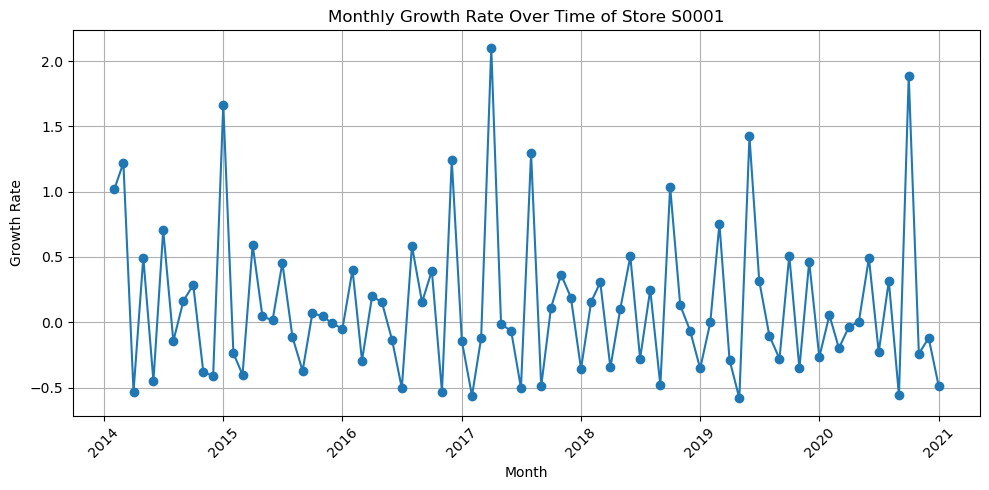

In [161]:
# Plotting the revenue over time
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(df['date'], df['rev_growth_rate'], marker='o', linestyle='-')  # Line plot with markers
plt.title('Monthly Growth Rate Over Time of Store S0001')  # Add a title
plt.xlabel('Month')  # X-axis label
plt.ylabel('Growth Rate')  # Y-axis label
plt.grid(True)  # Add gridlines (optional)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [162]:
# https://chatgpt.com/c/b7b729c0-e43c-403a-90b1-0476cbba6ad9
# Seems no pattern, GPT suggesting the following two time series model
# ARIMA (Autoregressive Integrated Moving Average)
# SARIMA (Seasonal ARIMA)

### ARIMA
ARIMA (Autoregressive Integrated Moving Average): Useful for non-seasonal data that is integrated and autoregressive. ARIMA models can capture the trends and randomness in the data.

In [163]:
from statsmodels.tsa.arima.model import ARIMA

In [254]:
df = revenue_store_month[revenue_store_month['store_key']== 'S0001']
df = df.dropna()
df.set_index('date', inplace=True)
df

,store_key,year,month,revenue,rev_growth_rate
date,,,,,
2014-02-01,S0001,2014,2,1172.25,1.017642
2014-03-01,S0001,2014,3,2603.00,1.220516
2014-04-01,S0001,2014,4,1216.75,-0.532559
2014-05-01,S0001,2014,5,1819.75,0.495582
2014-06-01,S0001,2014,6,1002.25,-0.449238
...,...,...,...,...,...
2020-09-01,S0001,2020,9,898.00,-0.559912
2020-10-01,S0001,2020,10,2591.50,1.885857
2020-11-01,S0001,2020,11,1965.75,-0.241462


In [255]:
validation = df[df.year>=2020]
train = df[df.year<2020]
train

,store_key,year,month,revenue,rev_growth_rate
date,,,,,
2014-02-01,S0001,2014,2,1172.25,1.017642
2014-03-01,S0001,2014,3,2603.00,1.220516
2014-04-01,S0001,2014,4,1216.75,-0.532559
2014-05-01,S0001,2014,5,1819.75,0.495582
2014-06-01,S0001,2014,6,1002.25,-0.449238
...,...,...,...,...,...
2019-08-01,S0001,2019,8,2181.00,-0.102746
2019-09-01,S0001,2019,9,1570.25,-0.280032
2019-10-01,S0001,2019,10,2372.75,0.511065


In [256]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [257]:
# Fit an ARIMA model
# Example parameters: p=1, d=1, q=1
model = ARIMA(train['rev_growth_rate'], order=(5, 2, 1))
model_fit = model.fit()

# Summary of the model
# print(model_fit.summary())

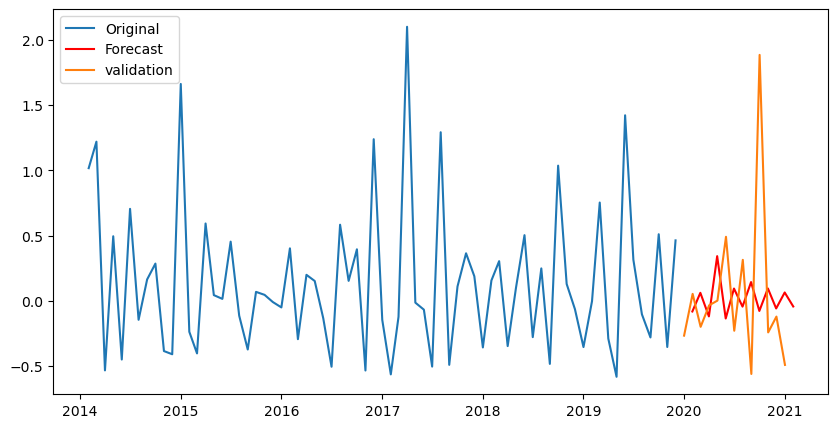

In [275]:
# Forecast future values
forecasts = model_fit.forecast(steps=13)  # Forecasting the next 5 periods
# print(forecasts)

# Plot the original data and the forecasts
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['rev_growth_rate'], label='Original')
plt.plot(pd.date_range(start=train.index[-1], periods=14, freq='M')[1:], forecasts, label='Forecast', color='red')
plt.plot(validation.index, validation['rev_growth_rate'], label='validation')
plt.legend()
plt.show()

In [282]:
validation['rev_growth_rate'].mean()

0.046875054117025305

In [283]:
forecasts.mean()

0.019128960461207958

In [281]:
print(forecasts)

2020-01-01   -0.081053
2020-02-01    0.062018
2020-03-01   -0.118765
2020-04-01    0.343069
2020-05-01   -0.134851
2020-06-01    0.094839
2020-07-01   -0.043772
2020-08-01    0.144407
2020-09-01   -0.076958
2020-10-01    0.095605
2020-11-01   -0.057846
2020-12-01    0.064697
2021-01-01   -0.042714
Freq: MS, Name: predicted_mean, dtype: float64


### SARIMA (Seasonal ARIMA)
Extends ARIMA by adding support for seasonality. SARIMA is effective for data that exhibits seasonal effects like the one shown in your graph.

In [284]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [285]:
df = revenue_store_month[revenue_store_month['store_key']== 'S0001']
df = df.dropna()
df.set_index('date', inplace=True)
df

,store_key,year,month,revenue,rev_growth_rate
date,,,,,
2014-02-01,S0001,2014,2,1172.25,1.017642
2014-03-01,S0001,2014,3,2603.00,1.220516
2014-04-01,S0001,2014,4,1216.75,-0.532559
2014-05-01,S0001,2014,5,1819.75,0.495582
2014-06-01,S0001,2014,6,1002.25,-0.449238
...,...,...,...,...,...
2020-09-01,S0001,2020,9,898.00,-0.559912
2020-10-01,S0001,2020,10,2591.50,1.885857
2020-11-01,S0001,2020,11,1965.75,-0.241462


In [286]:
validation = df[df.year>=2020]
train = df[df.year<2020]
train

,store_key,year,month,revenue,rev_growth_rate
date,,,,,
2014-02-01,S0001,2014,2,1172.25,1.017642
2014-03-01,S0001,2014,3,2603.00,1.220516
2014-04-01,S0001,2014,4,1216.75,-0.532559
2014-05-01,S0001,2014,5,1819.75,0.495582
2014-06-01,S0001,2014,6,1002.25,-0.449238
...,...,...,...,...,...
2019-08-01,S0001,2019,8,2181.00,-0.102746
2019-09-01,S0001,2019,9,1570.25,-0.280032
2019-10-01,S0001,2019,10,2372.75,0.511065


In [317]:
# Example: SARIMA(1, 1, 1)(1, 1, 1, 12) for monthly data with an annual pattern
model = SARIMAX(train['rev_growth_rate'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Print out summary of the model
# print(model_fit.summary())

In [316]:
# model_fit.plot_diagnostics(figsize=(15, 12))
# plt.show()

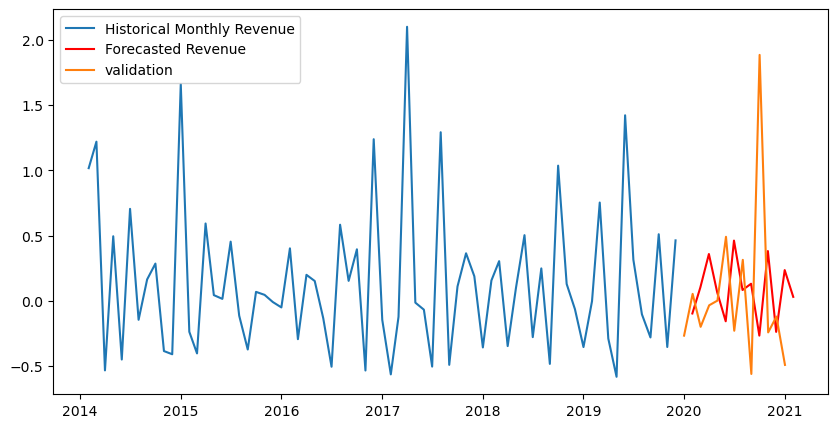

In [290]:
# Forecasting the next 12 months
forecast = model_fit.forecast(steps=13)

# Plotting the original data and the forecasts
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['rev_growth_rate'], label='Historical Monthly Revenue')
plt.plot(pd.date_range(train.index[-1], periods=14, freq='M')[1:], forecast, label='Forecasted Revenue', color='red')
plt.plot(validation.index, validation['rev_growth_rate'], label='validation')
plt.legend()
plt.show()

In [291]:
validation['rev_growth_rate'].mean()

0.046875054117025305

In [293]:
forecast.mean()

0.08468985449200203